# Capstone Project - Dry Bars
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)



## Introduction: Business Problem <a name="introduction"></a>

In this project, we will try to find an ideal location for an express beauty salon. Specifically, this report will be directed to stakeholders interested in opening a **Dry bars** in **Rio de Janeiro**, Brazil.

**Dry bars** was a concept that emerged in California in 2010, but little explored in Brazil. It is a segment that offers fast beauty salon services at prices that promise to be more accessible than in traditional spaces.

As there are many salons in Rio de Janeiro, we will try to detect **places that are not yet full of salons**. We are also particularly interested in **areas without nearby**. We would also prefer locations **as close to the city center as possible** , assuming the first two conditions are met.

We will use our data science powers to generate some more promising neighborhoods based on these criteria. The advantages of each area will then be clearly expressed so that the best possible final location can be chosen by the interested parties.

<a name="data"></a>[Scroll Back to Table of Contents](#tableofcontents)

## Data <a name="data"></a>

Based on the definition of our problem, the factors that will influence our decision are:

* Number of lounges in the neighborhood (any type of lounge not only for Dry Bars)
* Number and distance of rooms in the neighborhood, if any
* distance from the neighborhood to the city center

We decided to use a grid of places with regular spacing, centered in the center of the city, to define our neighborhoods.

The following data sources will be needed to extract / generate the necessary information:

* the centers of the candidate areas will be generated algorithmically and the approximate addresses of the centers of these areas will be obtained using the **Google Maps API reverse geocoding**
* number of rooms and their type and location in each neighborhood will be obtained using the **Foursquare API**
* the coordinate of the center of Rio de Janeiro will be obtained using the **Google Maps API geocoding**.




## Set 

In [1]:
import pandas as pd
import requests
from pandas.io.json import json_normalize 
import warnings
warnings.filterwarnings('ignore')

### Neighborhood Candidates

Create latitude and longitude coordinates for the centroid, and delimit an area of coverage, which in this case draws only from the region of

 #### 1.Use geopy library to get the latitude and longitude values of Manhattan.
 
 I will define the location of Manhattan

In [27]:
from geopy.geocoders import Nominatim

address = 'Midtown Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")

location = geolocator.geocode(address)

latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {}, are {}, {}.'.format(address,latitude, longitude))

The geograpical coordinate of Midtown Manhattan, NY, are 40.7601085, -73.97816329087175.


##  Viewing Manhattan District neighborhoods

The location data of Manhattan neighborhoods are on file in cvs, a report of this process is on Github.

In [4]:
manhattan_data=pd.read_csv("manhattan.csv")

manhattan_data.head(2)

,Unnamed: 0,Borough,Neighborhood,Latitude,Longitude
0,0,Manhattan,Marble Hill,40.876551,-73.910660
1,1,Manhattan,Chinatown,40.715618,-73.994279


## Extracting data with the Foursquare API

Now, let's see the top 100 locations that are in Midtown Manhattan within a 10,000-meter radius.

In [7]:
CLIENT_ID = 'P5MNEPLK4OXEDGPBP45SWSLTU1TY4R1DU4ZGMFBBOZCP23MO'# your Foursquare ID
CLIENT_SECRET = '3UTVUFOEVCRFZU5RGBMOSR4AFQG4BB4XXVN0P1NQMQNEFK2H'# your Foursquare Secret
ACCESS_TOKEN = "L5FWYDVVHZXJ4GKNOAD45X22X5MVYZJIFJHE1YJXFGDFB4YN"# your FourSquare Access Token
VERSION = '20180604'

In [37]:
search_query = 'Drybar'
radius = 8000
LIMIT = 100
print(search_query + ' .... OK!')

Drybar .... OK!


In [38]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius,LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=P5MNEPLK4OXEDGPBP45SWSLTU1TY4R1DU4ZGMFBBOZCP23MO&client_secret=3UTVUFOEVCRFZU5RGBMOSR4AFQG4BB4XXVN0P1NQMQNEFK2H&ll=40.7601085,-73.97816329087175&oauth_token=L5FWYDVVHZXJ4GKNOAD45X22X5MVYZJIFJHE1YJXFGDFB4YN&v=20180604&query=Drybar&radius=8000&limit=50'

In [48]:
results_dry= requests.get(url).json()

venues = results_dry['response']['venues']

df_dry = json_normalize(venues)

df_dry.head(2)

,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,...,location.country,location.formattedAddress,venuePage.id,location.neighborhood,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name
0,5345ddce498e374167fa7173,DryBar,"[{'id': '4bf58dd8d48988d110951735', 'name': 'S...",v-1619001571,False,141 E 56th St,56th Street And Lexington Avenue,40.760087,-73.969126,"[{'label': 'display', 'lat': 40.76008684544023...",...,United States,[141 E 56th St (56th Street And Lexington Aven...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4f2064f8e4b0a00cf1d3c3c1,Drybar,"[{'id': '4bf58dd8d48988d110951735', 'name': 'S...",v-1619001571,False,119 W 56th St,btwn 6th & 7th Ave,40.764110,-73.978769,"[{'label': 'display', 'lat': 40.76410996501346...",...,United States,"[119 W 56th St (btwn 6th & 7th Ave), New York,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df_dry.shape

(41, 25)

## Para abrir a coluna "categories"

There is some important information within the categories variable, let's open and build a dataframe with the columns that include the name of the place and everything associated with the place.

In [50]:
filtered_columns = ['name', 'categories'] + [col for col in df_dry.columns if col.startswith('location.')] + ['id']

dataframe_filtered=df_dry.loc[:, filtered_columns]

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

    
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# limpe os nomes das colunas mantendo apenas o último termo

dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.head(2)



,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,DryBar,Salon / Barbershop,141 E 56th St,56th Street And Lexington Avenue,40.760087,-73.969126,"[{'label': 'display', 'lat': 40.76008684544023...",762,10022,US,New York,NY,United States,[141 E 56th St (56th Street And Lexington Aven...,NaN,5345ddce498e374167fa7173
1,Drybar,Salon / Barbershop,119 W 56th St,btwn 6th & 7th Ave,40.764110,-73.978769,"[{'label': 'display', 'lat': 40.76410996501346...",448,10019,US,New York,NY,United States,"[119 W 56th St (btwn 6th & 7th Ave), New York,...",NaN,4f2064f8e4b0a00cf1d3c3c1


In [51]:
dataframe_filtered.shape

(41, 16)

Filtering the columns that interest us

In [52]:
df_midtown=dataframe_filtered[['id','name', 'categories', 'lat', 'lng','distance']]
df_midtown.head()

,id,name,categories,lat,lng,distance
0,5345ddce498e374167fa7173,DryBar,Salon / Barbershop,40.760087,-73.969126,762
1,4f2064f8e4b0a00cf1d3c3c1,Drybar,Salon / Barbershop,40.764110,-73.978769,448
2,558e9564498e4c9557996706,Drybar Bryant Park,Salon / Barbershop,40.751130,-73.980992,1027
3,4e6f679dae604d1b459a5154,DryBar,Salon / Barbershop,40.737554,-73.993193,2812
4,5db77e4d10a19d000875e753,Drybar,Health & Beauty Service,40.766853,-73.981578,804


### Saving the above two dataframes

In [53]:
df_midtown.to_csv("df_midtown.csv", index=False)

# View the Dry Bars near Midtown Manhattan

In [2]:
# Generate map centered around Midtown Manhattan New York
import folium

Midtown_Manhattan_Map= folium.Map(location=[latitude, longitude], zoom_start=12)  

# add a red circle marker to represent the Midtown Manhattan

folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Midtown Manhattan',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(Midtown_Manhattan_Map)


# add the Dry Bars as blue circle markers


for lat, lng, label in zip(df_midtown.lat, df_midtown.lng, df_midtown.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(Midtown_Manhattan_Map)

# display map


Midtown_Manhattan_Map

NameError: name 'latitude' is not defined

# Analysis

### Explore likes and rating

In [55]:
len(results_dry["response"]["venues"])

41

In [96]:
#lista_id=df_midtown["id"]
#lista_id.tolist()
#lista_id

In [331]:
#Thiago

CLIENT_ID = 'NEY31EWLA20BXGLRP4TEJKOZ2BHRW4IHSZDSXRRJTEO4DL5S' # Foursquare ID
CLIENT_SECRET = 'OEFPZLW11ZSW03TMMCC2JX2U0KI5AUANNR4G2LNSZNF0VIXR' # Foursquare Secret
ACCESS_TOKEN = '4E5F2L0KN00FDXI5W5AXLDBNUGAGKVBE2EW5CZB1L3D1LUSA' # FourSquare Access Token=

In [83]:
results_dry['response']['venues'][0]["id"]

'5345ddce498e374167fa7173'

In [65]:
#venue_id="5345ddce498e374167fa7173"
#url= 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN, VERSION)
    
#resultadovenue= requests.get(url).json()

In [84]:
resultadovenue["response"]["venue"].keys()

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'url', 'likes', 'like', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'popular', 'seasonalHours', 'pageUpdates', 'inbox', 'attributes', 'bestPhoto', 'colors'])

In [311]:
print(resultadovenue['response']['venue']["name"])
print(resultadovenue['response']['venue']['rating'])
print(resultadovenue['response']['venue']['tips']['groups'][1]['items'][0]["text"])

DryBar
8.4
My favorite Dry Bar! The stylists know how to handle my big curly hair. Other places leave my hair dried and fried, but the stylists here use products to protect my hair. Haven't been disappointed yet


In [312]:
resultado_nome=[]
resultado_rating=[]
resultado_texto=[]


for results in resultadovenue:
    resultado_nome.append(resultadovenue['response']['venue']["name"])
    resultado_rating.append(resultadovenue['response']['venue']['rating'])
    resultado_texto.append(resultadovenue['response']['venue']['tips']['groups'][1]['items'][0]["text"])
    


TypeError: string indices must be integers

In [99]:
resultado_nome

['DryBar', 'DryBar', 'DryBar']

In [100]:
resultado_rating

[8.4, 8.4, 8.4]

In [101]:
resultado_texto

["My favorite Dry Bar! The stylists know how to handle my big curly hair. Other places leave my hair dried and fried, but the stylists here use products to protect my hair. Haven't been disappointed yet",
 "My favorite Dry Bar! The stylists know how to handle my big curly hair. Other places leave my hair dried and fried, but the stylists here use products to protect my hair. Haven't been disappointed yet",
 "My favorite Dry Bar! The stylists know how to handle my big curly hair. Other places leave my hair dried and fried, but the stylists here use products to protect my hair. Haven't been disappointed yet"]

In [ ]:
resultado_nome=[]
resultado_rating=[]
resultado_texto=[]


for results in resultadovenue:
    resultado_nome.append(resultadovenue['response']['venue']["name"])
    resultado_rating.append(resultadovenue['response']['venue']['rating'])
    resultado_texto.append(resultadovenue['response']['venue']['tips']['groups'][1]['items'][0]["text"])
    


In [321]:
resultado_rating

[8.4, 8.0, 6.9, 8.5]

In [322]:
resultado_text

[]

In [327]:
lista_id[15]

'5b7d6c786fd626002c394614'

In [329]:
resultado_for

{'meta': {'code': 400,
  'errorType': 'param_error',
  'errorDetail': 'Value 5 is invalid for venue id',
  'requestId': '608097d0126a804c34ef17b3'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {}}

In [333]:
#Thiago

#CLIENT_ID = 'NEY31EWLA20BXGLRP4TEJKOZ2BHRW4IHSZDSXRRJTEO4DL5S' # Foursquare ID
#CLIENT_SECRET = 'OEFPZLW11ZSW03TMMCC2JX2U0KI5AUANNR4G2LNSZNF0VIXR' # Foursquare Secret
#ACCESS_TOKEN = '4E5F2L0KN00FDXI5W5AXLDBNUGAGKVBE2EW5CZB1L3D1LUSA' # FourSquare Access Token=

In [344]:
CLIENT_ID = 'P5MNEPLK4OXEDGPBP45SWSLTU1TY4R1DU4ZGMFBBOZCP23MO'# your Foursquare ID
CLIENT_SECRET = '3UTVUFOEVCRFZU5RGBMOSR4AFQG4BB4XXVN0P1NQMQNEFK2H'# your Foursquare Secret
ACCESS_TOKEN = "L5FWYDVVHZXJ4GKNOAD45X22X5MVYZJIFJHE1YJXFGDFB4YN"# your FourSquare Access Token
VERSION = '20180604'

In [345]:
#venue_id = lista_id

resultado_rating

#for results in venue_id:

   # url= 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(results, CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN, VERSION)
   # resultado_for= requests.get(url).json()
        
    #resultado_rating.append( resultado_for['response']['venue']['rating'])
    
    #print(resultado_rating)
  

[8.4, 8.0, 6.9, 8.5]

In [351]:
url= 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(
    results, CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN, VERSION)

resultado_for= requests.get(url).json()

resultado_for['response']['venue']['rating']
    

8.5

In [360]:
venue=lista_id[3]
venue

'4e6f679dae604d1b459a5154'

In [361]:
url= 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(venue, CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN, VERSION)
resultado_for= requests.get(url).json()

In [363]:
response=resultado_for['response']['venue']['rating']
response

8.5

In [371]:
venue


'5740c975498e39a5c6e1e6da'

In [373]:
resultado_for

{'meta': {'code': 400,
  'errorType': 'param_error',
  'errorDetail': 'Value a is invalid for venue id',
  'requestId': '6080a4680b7c1d11da736b3a'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {}}

In [369]:
venue=lista_id[25]
venue

for results in venue:

    url= 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(results, CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN, VERSION)
    resultado_for= requests.get(url).json()
    
    try:
            
        response=resultado_for['response']['venue']['rating']
    
    except:
        response = 0  
    
    print(response)

0
7.6
0
0
0
0
7.6
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [372]:
response=resultado_for['response']['venue']['rating']

KeyError: 'venue'

In [370]:
len(response)

TypeError: object of type 'int' has no len()

In [359]:
resultado_for['response']['venue']['rating']

KeyError: 'venue'

In [349]:
resultado_for['response']['venue'].keys()

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'likes', 'like', 'dislike', 'ok', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'seasonalHours', 'pageUpdates', 'inbox', 'parent', 'hierarchy', 'attributes', 'bestPhoto'])

In [324]:
resultado_for

{'meta': {'code': 200, 'requestId': '608039e35d3cab4943c72053'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'venue': {'id': '5db77e4d10a19d000875e753',
   'name': 'Drybar',
   'contact': {},
   'location': {'lat': 40.766853,
    'lng': -73.981578,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.766853,
      'lng': -73.981578}],
    'postalCode': '10019',
    'cc': 'US',
    'city': 'New York',
    'state': 'NY',
    'country': 'United States',
    'formattedAddress': ['New York, NY 10019', 'United States']},
   'canonicalUrl': 'https://foursquare.com/v/drybar/5db77e4d10a19d000875e753',
   'categories': [{'id': '54541900498ea6ccd0202697',
     'name': 'Health & Beauty Service',
     'pluralName': 'Health & Beauty Services',
     'shortName': 'Health & Beauty',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/salon_barber_',
      'suffix': '.png'},
     'primary': True},
    {'id': '4bf58dd8d48988d1109517

# 22-04

In [ ]:
#Busando os Rating

# Concatenar as colunas 

In [125]:
df1= pd.read_csv("df_midtown.csv")
df1.head(2)

,id,name,categories,lat,lng,distance
0,5345ddce498e374167fa7173,DryBar,Salon / Barbershop,40.760087,-73.969126,762
1,4f2064f8e4b0a00cf1d3c3c1,Drybar,Salon / Barbershop,40.764110,-73.978769,448


In [126]:
df2=pd.read_csv("likes.csv")
df2.head(2)

,likes
0,62
1,62


In [127]:
df_likes=pd.concat([df1, df2],axis=1)
df_likes.head(2)

,id,name,categories,lat,lng,distance,likes
0,5345ddce498e374167fa7173,DryBar,Salon / Barbershop,40.760087,-73.969126,762,62
1,4f2064f8e4b0a00cf1d3c3c1,Drybar,Salon / Barbershop,40.764110,-73.978769,448,62


# Kmeans 

In [128]:
df_midtown=df1
df_midtown.shape

(41, 6)

In [129]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

ValueError: x and y must have same first dimension, but have shapes (6,) and (18,)

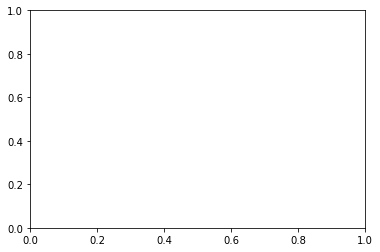

In [130]:
df_filter=df_likes[["lat","lng"]]


Ks = range(2,8)

for K in Ks:
    modelo = KMeans(n_clusters = K, random_state = 101)
    modelo.fit(df_filter)
    valores_metrica.append(modelo.inertia_)
    
plt.plot(Ks, valores_metrica, 'o-')
plt.xlabel("K-cluster")
plt.ylabel("Inertia")
plt.title('Elbow Method For Optimal k')
plt.show()


Elbow method does not seem to help us to determine the optimal number of clusters. Let's use another method.

The Silhouette Method - The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation).

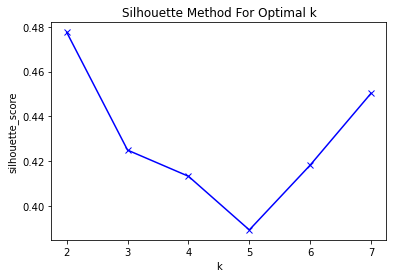

In [131]:
sil = []

K_sil = range(2,8)

# minimum 2 clusters required, to define dissimilarity
for k in K_sil:    
    modelo_s = KMeans(n_clusters = k).fit(df_filter)
    labels = modelo_s.labels_
    sil.append(silhouette_score(df_filter, labels, metric = 'euclidean'))
    
plt.plot(K_sil, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('Silhouette Method For Optimal k')
plt.show()

There is a peak at k = 6,  and k = 8. Two and four clusters will give a very broad classification of the venues.

###  Let's set number of clusters = 8

In [132]:
# set number of clusters
kclusters = 6

# run k-means clustering
kmeans_ = KMeans(init="k-means++", n_clusters=kclusters, n_init=50).fit(df_filter)

In [133]:
df_likes.insert(0, 'ClusterLabels', kmeans_.labels_)

## Vizualizando os Cluster 

In [134]:
df_likes.head(2)

,ClusterLabels,id,name,categories,lat,lng,distance,likes
0,3,5345ddce498e374167fa7173,DryBar,Salon / Barbershop,40.760087,-73.969126,762,62
1,3,4f2064f8e4b0a00cf1d3c3c1,Drybar,Salon / Barbershop,40.764110,-73.978769,448,62


In [135]:
for lat, lon, clusters, name in zip(df_likes['lat'],df_likes['lng'],
                                    df_likes['ClusterLabels'],df_likes['categories']):
    label=folium.Popup(str(name) + ' Cluster ' + str(clusters), parse_html=True)
    folium.CircleMarker([lat, lon],radius=5,
        popup=label,
        fill=True,
        color=colors[clusters],
        fill_color=colors[clusters],
        fill_opacity=0.6
        ).add_to(cluster_map)

cluster_map

TypeError: 'module' object is not subscriptable

In [113]:
for lat, lon, clusters, name in zip(df_likes['lat'],df_likes['lng'],
                                    df_likes['ClusterLabels'],df_likes['name']):
    label=folium.Popup(str(name) + ' Cluster ' + str(clusters), parse_html=True)
    folium.CircleMarker([lat, lon],radius=5,
        popup=label,
        fill=True,
        color=colors[clusters],
        fill_color=colors[clusters],
        fill_opacity=0.6
        ).add_to(cluster_map)

cluster_map

TypeError: 'module' object is not subscriptable

Quero saber os cluster que tem mais likes 

In [206]:
df_likes.groupby(["ClusterLabels"])["likes"].sum()

ClusterLabels
0    113
1    324
2    134
3    222
4      3
5      7
Name: likes, dtype: int64

O cluster 3 tem mais likes, então vou buscar o centróide para fazer uma busca com um raio bem menor dentro do cluster 

In [137]:
kmeans_.cluster_centers_

array([[ 40.77000968, -73.95795564],
       [ 40.73790201, -73.98754391],
       [ 40.71178498, -74.00418789],
       [ 40.76489487, -73.98071428],
       [ 40.72989924, -74.03575316],
       [ 40.79772744, -73.96927744]])

In [207]:
kmeans_.cluster_centers_[1]

array([ 40.73790201, -73.98754391])

In [159]:
lat_cluster=kmeans_.cluster_centers_[4][0]
lat_cluster

40.72989923693848

In [160]:
lng_cluster=kmeans_.cluster_centers_[4][1]
lng_cluster

-74.03575315649414

In [310]:
#Thiago
#CLIENT_ID = 'NEY31EWLA20BXGLRP4TEJKOZ2BHRW4IHSZDSXRRJTEO4DL5S' # Foursquare ID
#CLIENT_SECRET = 'OEFPZLW11ZSW03TMMCC2JX2U0KI5AUANNR4G2LNSZNF0VIXR' # Foursquare Secret
#ACCESS_TOKEN = '4E5F2L0KN00FDXI5W5AXLDBNUGAGKVBE2EW5CZB1L3D1LUSA' # FourSquare Access Token=

#Edlaine 
CLIENT_ID = 'P5MNEPLK4OXEDGPBP45SWSLTU1TY4R1DU4ZGMFBBOZCP23MO'# your Foursquare ID
CLIENT_SECRET = '3UTVUFOEVCRFZU5RGBMOSR4AFQG4BB4XXVN0P1NQMQNEFK2H'# your Foursquare Secret
ACCESS_TOKEN = "L5FWYDVVHZXJ4GKNOAD45X22X5MVYZJIFJHE1YJXFGDFB4YN"# your FourSquare Access Token
VERSION = '20180604'


## Categorias

In [307]:
URL="https://api.foursquare.com/v2/venues/suggestcompletion?&client_id={}&client_secret={}&v={}".format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION,search_query)

In [308]:
search_query = 'DyrBar'
radius = 50
LIMIT=30


In [309]:
teste=requests.get(URL).json()
teste

{'meta': {'code': 400,
  'errorType': 'other',
  'errorDetail': 'Must provide parameter query',
  'requestId': '608036fbe6ed807a5521d60e'},
 'response': {}}

In [150]:
url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION)
category_results = requests.get(url).json()

In [151]:
# Procurar as categorias 
category_list = category_results['response']['categories']
for data in category_list:
    print(data['id'], data['name'])

4d4b7104d754a06370d81259 Arts & Entertainment
4d4b7105d754a06372d81259 College & University
4d4b7105d754a06373d81259 Event
4d4b7105d754a06374d81259 Food
4d4b7105d754a06376d81259 Nightlife Spot
4d4b7105d754a06377d81259 Outdoors & Recreation
4d4b7105d754a06375d81259 Professional & Other Places
4e67e38e036454776db1fb3a Residence
4d4b7105d754a06378d81259 Shop & Service
4d4b7105d754a06379d81259 Travel & Transport


Para saber as subcategorias

In [152]:
# function to flatten a 'parent_id' category, returns all categories if checkParentID = False
def flatten_Hierarchy(category_list, checkParentID, category_dict, parent_id = ''):
    for data in category_list:
        
        if checkParentID == True and data['id'] == parent_id:
            category_dict[data['id']] = data['name']
            flatten_Hierarchy(category_list = data['categories'], checkParentID = False, category_dict = category_dict)
        
        elif checkParentID == False:
            category_dict[data['id']] = data['name']
            if len(data['categories']) != 0:
                flatten_Hierarchy(category_list = data['categories'], checkParentID = False, category_dict = category_dict)
    
    return category_dict

In [378]:
# Para conhecer  a subcategoria a partir do id da categoria.

category_dict = flatten_Hierarchy(category_list, checkParentID=True, category_dict = {}, parent_id = '4d4b7105d754a06379d81259')
category_dict

{'4d4b7105d754a06379d81259': 'Travel & Transport',
 '4bf58dd8d48988d1ed931735': 'Airport',
 '5f2c42335b4c177b9a6dc927': 'Airfield',
 '4bf58dd8d48988d1ef931735': 'Airport Food Court',
 '4bf58dd8d48988d1f0931735': 'Airport Gate',
 '4eb1bc533b7b2c5b1d4306cb': 'Airport Lounge',
 '56aa371be4b08b9a8d57352f': 'Airport Service',
 '4bf58dd8d48988d1eb931735': 'Airport Terminal',
 '4bf58dd8d48988d1ec931735': 'Airport Tram',
 '5744ccdfe4b0c0459246b4e5': 'Baggage Claim',
 '4bf58dd8d48988d1f7931735': 'Plane',
 '5744ccdfe4b0c0459246b4e8': 'Baggage Locker',
 '4e4c9077bd41f78e849722f9': 'Bike Rental / Bike Share',
 '5744ccdfe4b0c0459246b4c1': 'Boat Rental',
 '4bf58dd8d48988d12d951735': 'Boat or Ferry',
 '52f2ab2ebcbc57f1066b8b4b': 'Border Crossing',
 '4bf58dd8d48988d1fe931735': 'Bus Station',
 '4bf58dd8d48988d12b951735': 'Bus Line',
 '52f2ab2ebcbc57f1066b8b4f': 'Bus Stop',
 '52f2ab2ebcbc57f1066b8b50': 'Cable Car',
 '55077a22498e5e9248869ba2': 'Cruise Ship',
 '589ddde98ae3635c072819ee': 'Duty-free Shop'

### Buscar categorias próximos ao centroíde

In [273]:
kmeans_.cluster_centers_[1]

array([ 40.73790201, -73.98754391])

In [277]:
lat_cluster=kmeans_.cluster_centers_[1][0]
print(lat_cluster)
lng_cluster=kmeans_.cluster_centers_[1][1]
print(lng_cluster)

40.737902014980186
-73.98754391256458


In [381]:
lat=lat_cluster
lng=lng_cluster


def getNearbyFood(names, latitudes, longitudes, radius=100, LIMIT=300):
    not_found = 0
    print('***Start ', end='')
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(' .', end='')
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            "4d4b7105d754a06379d81259", # "'Business Center'
            LIMIT)
            
        try:
            # make the GET request
            results = requests.get(url).json()['response']['venues']
            
            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['name'], 
                v['location']['lat'], 
                v['location']['lng'],  
                v['categories'][0]['name']) for v in results])
        except:
            not_found += 1


    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    print("\nDone*** with {} venues with incompelete information.".format(not_found))
    return(nearby_venues)

In [386]:
import pickle # to serialize and deserialize a Python object structure
try:
    with open('nyc_food_venues.pkl', 'rb') as f:
        nyc_venues = pickle.load(f)
    print("---Dataframe Existed and Deserialized---")
except:
    nyc_venues = getNearbyFood(names=neighborhoods['Neighborhood'],
                                        latitudes=neighborhoods['Latitude'],
                                        longitudes=neighborhoods['Longitude']
                                       )
    with open('nyc_food_venues.pkl', 'wb') as f:
        pickle.dump(nyc_venues, f)
    print("---Dataframe Created and Serialized---")

---Dataframe Existed and Deserialized---


In [387]:
print(nyc_venues.shape)
nyc_venues.head()

(2000, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Dunkin',40.879296,-73.905135,Café
1,Marble Hill,40.876551,-73.91066,Taqueria Sinaloense,40.874574,-73.910687,Mexican Restaurant
2,Marble Hill,40.876551,-73.91066,Wendy's,40.884697,-73.901217,Fast Food Restaurant
3,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop
4,Marble Hill,40.876551,-73.91066,Neem,40.886483,-73.909830,Indian Restaurant


In [384]:
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            "4d4b7105d754a06379d81259", # "'Business Center'
            LIMIT)
            
        
            # make the GET request
results = requests.get(url).json()['response']['venues']

In [385]:
results

[{'id': '51a374638bbd3ff0e5716aff',
  'name': 'Citi Bike Station',
  'location': {'address': 'W 20th St & Park Ave S',
   'lat': 40.73825122,
   'lng': -73.98746429,
   'labeledLatLngs': [{'label': 'display',
     'lat': 40.73825122,
     'lng': -73.98746429}],
   'distance': 39,
   'postalCode': '10004',
   'cc': 'US',
   'city': 'New York',
   'state': 'NY',
   'country': 'United States',
   'formattedAddress': ['W 20th St & Park Ave S',
    'New York, NY 10004',
    'United States']},
  'categories': [{'id': '4e4c9077bd41f78e849722f9',
    'name': 'Bike Rental / Bike Share',
    'pluralName': 'Bike Rentals / Bike Shares',
    'shortName': 'Bike',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/bikeshop_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1619048804',
  'hasPerk': False},
 {'id': '4be090d8652b0f47e4da7211',
  'name': 'M 3 Bus 18th Street Stop',
  'location': {'lat': 40.737480016666666,
   'lng': -73.987266,
   'labeledLatLngs': [{

In [382]:
print(nyc_venues.shape)
nyc_venues.head()

(2000, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Dunkin',40.879296,-73.905135,Café
1,Marble Hill,40.876551,-73.91066,Taqueria Sinaloense,40.874574,-73.910687,Mexican Restaurant
2,Marble Hill,40.876551,-73.91066,Wendy's,40.884697,-73.901217,Fast Food Restaurant
3,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop
4,Marble Hill,40.876551,-73.91066,Neem,40.886483,-73.909830,Indian Restaurant


In [280]:
print('There are {} uniques venues.'.format(len(nyc_venues['Venue'].unique())))

There are 774 uniques venues.


In [282]:
print('There are {} unique Business Center categories.'.format(len(nyc_venues['Venue Category'].unique())))

There are 113 unique Business Center categories.


In [283]:
nyc_onehot = pd.get_dummies(nyc_venues[['Venue Category']], prefix="", prefix_sep="")
nyc_onehot.head()

,African Restaurant,American Restaurant,Arcade,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Beer Garden,...,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theme Restaurant,Udon Restaurant,Ukrainian Restaurant,Vietnamese Restaurant,Wine Bar,Wings Joint
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [284]:
nyc_onehot['Neighborhood'] = nyc_venues['Neighborhood'] 
nyc_onehot.head()


,African Restaurant,American Restaurant,Arcade,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Beer Garden,...,Tapas Restaurant,Tea Room,Thai Restaurant,Theme Restaurant,Udon Restaurant,Ukrainian Restaurant,Vietnamese Restaurant,Wine Bar,Wings Joint,Neighborhood
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Marble Hill
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Marble Hill
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Marble Hill
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Marble Hill
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Marble Hill


In [285]:
Neighborhood = nyc_onehot['Neighborhood']

nyc_onehot.drop(labels=['Neighborhood'], axis=1,inplace = True)
nyc_onehot.insert(0, 'Neighborhood', Neighborhood)

nyc_onehot.head()


,Neighborhood,African Restaurant,American Restaurant,Arcade,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,...,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theme Restaurant,Udon Restaurant,Ukrainian Restaurant,Vietnamese Restaurant,Wine Bar,Wings Joint
0,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [286]:
venue_counts = nyc_onehot.groupby('Neighborhood').sum()
venue_counts.head(5)

,African Restaurant,American Restaurant,Arcade,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Beer Garden,...,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theme Restaurant,Udon Restaurant,Ukrainian Restaurant,Vietnamese Restaurant,Wine Bar,Wings Joint
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Battery Park City,0,1,0,0,0,0,1,3,1,1,...,0,0,0,0,0,0,0,0,1,0
Carnegie Hill,0,1,0,0,0,0,4,2,3,0,...,0,0,0,1,0,0,0,0,0,0
Central Harlem,1,2,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
Chelsea,0,5,0,0,0,0,2,3,0,0,...,0,0,0,1,0,0,0,0,0,0
Chinatown,0,0,0,1,2,0,0,4,0,0,...,1,0,0,3,0,0,0,1,0,0


In [287]:
venue_counts_described = venue_counts.describe().transpose()

In [288]:
venue_top10 = venue_counts_described.sort_values('max', ascending=False)[0:10]
venue_top10

,count,mean,std,min,25%,50%,75%,max
Coffee Shop,40.0,7.700,3.531543,2.0,5.00,7.0,10.0,16.0
Korean Restaurant,40.0,1.125,2.513425,0.0,0.00,0.0,0.0,9.0
Café,40.0,2.125,1.620185,0.0,1.00,2.0,3.0,6.0
Bakery,40.0,2.825,1.298668,0.0,2.00,3.0,4.0,6.0
Deli / Bodega,40.0,1.050,1.449138,0.0,0.00,1.0,1.0,6.0
Italian Restaurant,40.0,2.250,1.597273,0.0,1.00,2.0,3.0,6.0
Donut Shop,40.0,1.425,1.337573,0.0,0.75,1.0,2.0,6.0
French Restaurant,40.0,1.250,1.255756,0.0,0.00,1.0,2.0,5.0
Pizza Place,40.0,1.600,1.316561,0.0,1.00,1.0,2.0,5.0
Fast Food Restaurant,40.0,1.200,1.223698,0.0,0.00,1.0,2.0,5.0


In [290]:
venue_top10_list = venue_top10.index.values.tolist()

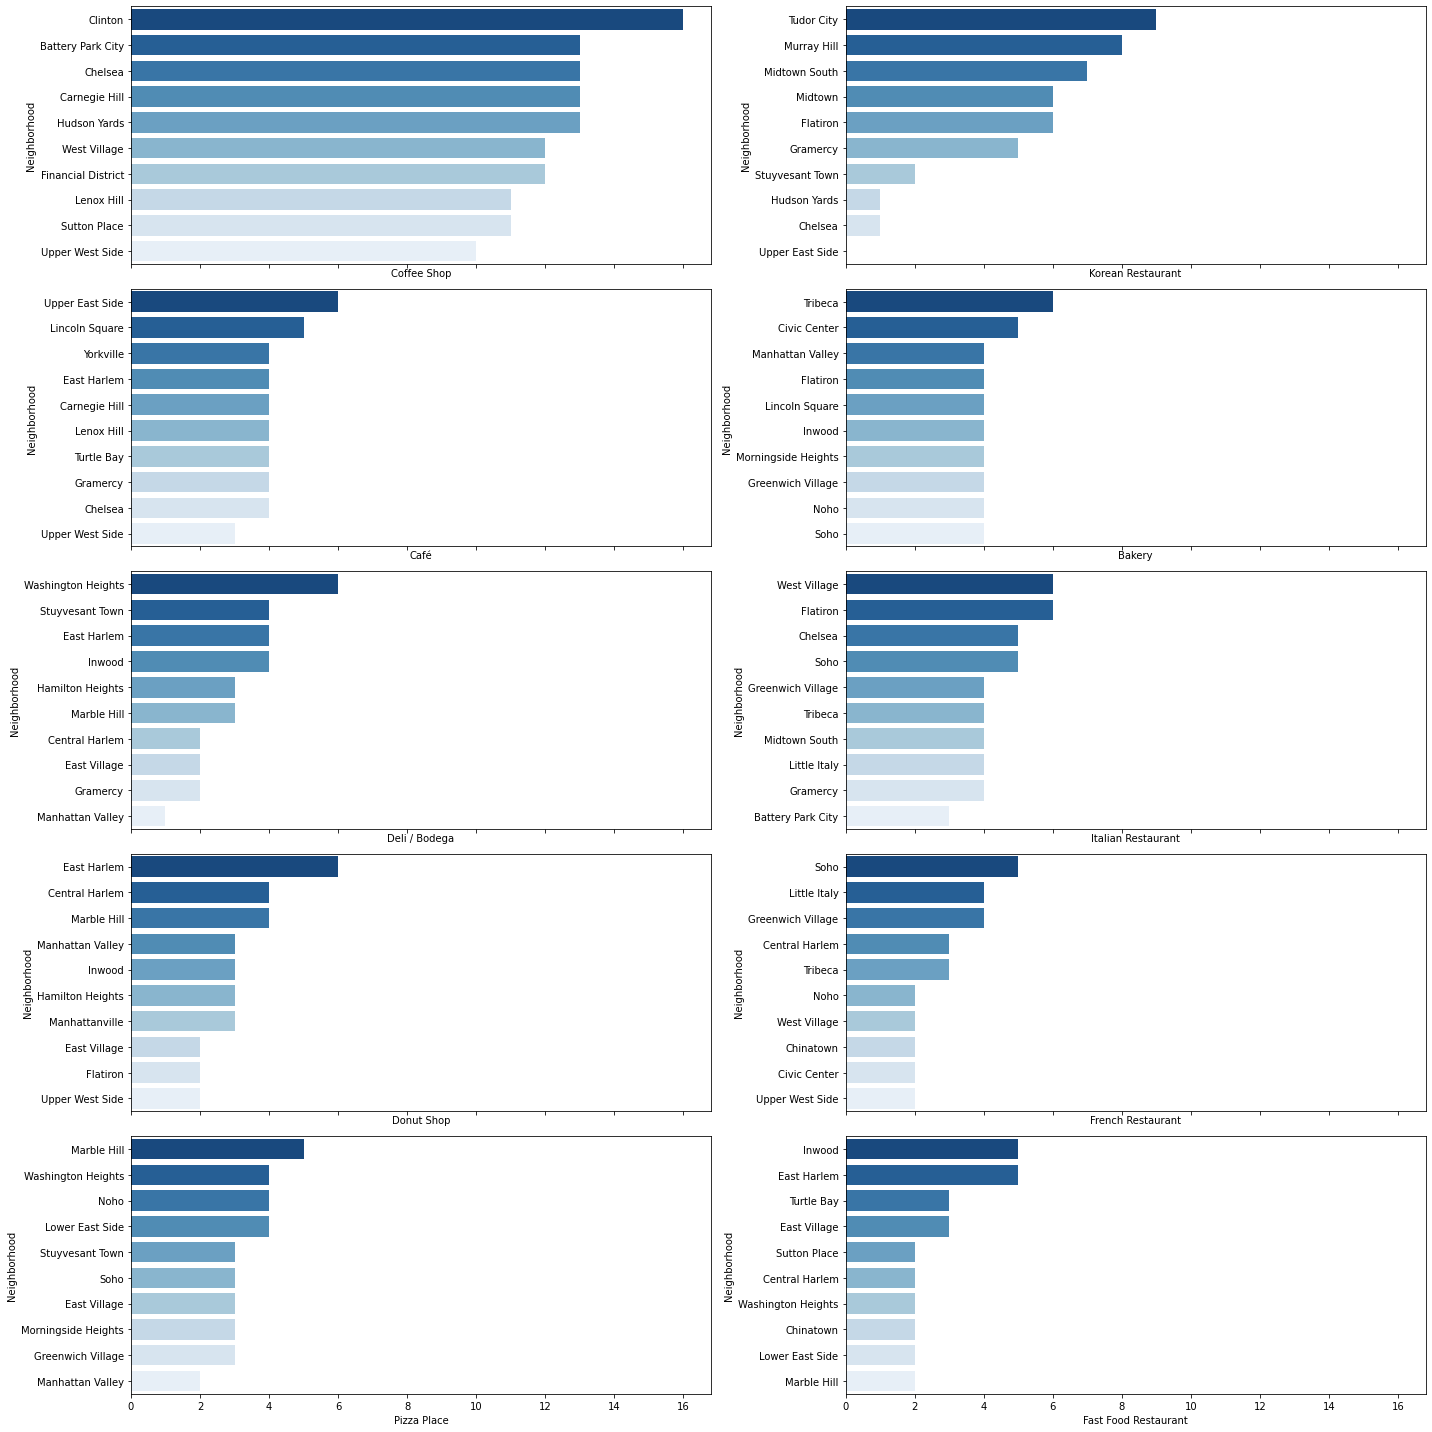

In [292]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes =plt.subplots(5, 2, figsize=(20,20), sharex=True)
axes = axes.flatten()

for ax, category in zip(axes, venue_top10_list):
    data = venue_counts[[category]].sort_values([category], ascending=False)[0:10]
    pal = sns.color_palette("Blues", len(data))
    sns.barplot(x=category, y=data.index, data=data, ax=ax, palette=np.array(pal[::-1]))

plt.tight_layout()
plt.show();

In [293]:
nyc_grouped = nyc_onehot.groupby('Neighborhood').mean().reset_index()
nyc_grouped.head()

,Neighborhood,African Restaurant,American Restaurant,Arcade,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,...,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theme Restaurant,Udon Restaurant,Ukrainian Restaurant,Vietnamese Restaurant,Wine Bar,Wings Joint
0,Battery Park City,0.00,0.02,0.0,0.00,0.00,0.0,0.02,0.06,0.02,...,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.02,0.00
1,Carnegie Hill,0.00,0.02,0.0,0.00,0.00,0.0,0.08,0.04,0.06,...,0.00,0.0,0.0,0.02,0.0,0.0,0.0,0.00,0.00,0.00
2,Central Harlem,0.02,0.04,0.0,0.00,0.00,0.0,0.00,0.02,0.02,...,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.02
3,Chelsea,0.00,0.10,0.0,0.00,0.00,0.0,0.04,0.06,0.00,...,0.00,0.0,0.0,0.02,0.0,0.0,0.0,0.00,0.00,0.00
4,Chinatown,0.00,0.00,0.0,0.02,0.04,0.0,0.00,0.08,0.00,...,0.02,0.0,0.0,0.06,0.0,0.0,0.0,0.02,0.00,0.00


In [294]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [295]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))    

In [296]:
# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = nyc_grouped['Neighborhood']

In [299]:
for ind in np.arange(nyc_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nyc_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.tail()


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
35,Upper East Side,Coffee Shop,Café,Burger Joint,Bar,Bakery
36,Upper West Side,Coffee Shop,Café,French Restaurant,Salad Place,Ramen Restaurant
37,Washington Heights,Deli / Bodega,Pizza Place,New American Restaurant,Latin American Restaurant,Mexican Restaurant
38,West Village,Coffee Shop,Italian Restaurant,New American Restaurant,American Restaurant,Bakery
39,Yorkville,Coffee Shop,Café,Bagel Shop,Bar,Bakery


In [302]:
neighborhoods_venues_sorted[neighborhoods_venues_sorted["Neighborhood"]=="Flatiron"]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
10,Flatiron,Coffee Shop,Korean Restaurant,Italian Restaurant,American Restaurant,Bakery


In [234]:
LIMIT = 100
radius = 100 

lat=lat_cluster
lng=lng_cluster

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat, 
    long, 
    radius, 
    LIMIT)

In [235]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6080288dc7528613f1d6564c'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'East Village',
  'headerFullLocation': 'East Village, New York',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 11,
  'suggestedBounds': {'ne': {'lat': 40.73079923783848,
    'lng': -73.98635846835722},
   'sw': {'lat': 40.728999236038476, 'lng': -73.98872935164277}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '3fd66200f964a5203de41ee3',
       'name': 'Sake Bar Decibel',
       'location': {'address': '240 E 9th St',
        'crossStreet': 'btwn 2nd & 3rd Ave.',
        'lat': 40.729416284697756,
        'lng': -73.98774516375057,
        'labeledLatLn

In [236]:
results = requests.get(url).json()

venues = results['response']['groups'][0]['items']
    
category_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']

category_venues =category_venues.loc[:, filtered_columns]

# filter the category for each row
category_venues['venue.categories'] = category_venues.apply(get_category_type, axis=1)

# clean columns
category_venues.columns = [col.split(".")[-1] for col in category_venues.columns]

category_venues.head()

,name,categories,lat,lng
0,Sake Bar Decibel,Sake Bar,40.729416,-73.987745
1,Hi-Collar - ハイカラ (Hi-Collar),Coffee Shop,40.729511,-73.987860
2,Whiskers Holistic Petcare inc.,Pet Store,40.729399,-73.987645
3,Cha-An Teahouse 茶菴,Tea Room,40.729577,-73.988036
4,ChikaLicious Dessert Bar,Dessert Shop,40.729645,-73.986484


### Para todos os bairros

In [237]:
LIMIT = 100
lat=lat_cluster
lng=lng_cluster


def getNearbyVenues(names, latitudes, longitudes, radius=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    category_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    category_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(category_venues)

Now write the code to run the above function on each neighborhood and create a new dataframe called manhattan_venues.

In [238]:
manhattan_category = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [239]:
print(manhattan_category.shape)
manhattan_category

(248, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Chinatown,40.715618,-73.994279,Off The Bridge,40.715622,-73.994237,Bike Shop
1,Chinatown,40.715618,-73.994279,Super Taste (百味蘭州拉面) (Super Taste),40.715198,-73.993511,Noodle House
2,Chinatown,40.715618,-73.994279,Yaya Tea Garden,40.716177,-73.994902,Tea Room
3,Chinatown,40.715618,-73.994279,The Leon Hotel,40.715994,-73.995171,Hotel
4,Inwood,40.867684,-73.921210,Furry Fiends,40.868254,-73.921552,Pet Store
...,...,...,...,...,...,...,...
243,Flatiron,40.739673,-73.990947,INTERMIX,40.739401,-73.991124,Boutique
244,Flatiron,40.739673,-73.990947,Club Monaco,40.740232,-73.990701,Clothing Store
245,Flatiron,40.739673,-73.990947,SLT Flatiron,40.739803,-73.990745,Gym / Fitness Center
246,Flatiron,40.739673,-73.990947,Ralph's Coffee,40.740023,-73.990626,Café


In [250]:
Flariton=manhattan_category[manhattan_category["Neighborhood"]=='Flatiron']
Flariton

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
237,Flatiron,40.739673,-73.990947,Five Iron Golf,40.738959,-73.991544,Sports Club
238,Flatiron,40.739673,-73.990947,Bottlerocket Wine & Spirit,40.739370,-73.992010,Wine Shop
239,Flatiron,40.739673,-73.990947,Thai Villa,40.739118,-73.990579,Thai Restaurant
240,Flatiron,40.739673,-73.990947,Nike Running,40.739903,-73.991079,Sporting Goods Shop
241,Flatiron,40.739673,-73.990947,Madewell,40.738838,-73.991021,Clothing Store
242,Flatiron,40.739673,-73.990947,SEPHORA,40.739164,-73.991113,Cosmetics Shop
243,Flatiron,40.739673,-73.990947,INTERMIX,40.739401,-73.991124,Boutique
244,Flatiron,40.739673,-73.990947,Club Monaco,40.740232,-73.990701,Clothing Store
245,Flatiron,40.739673,-73.990947,SLT Flatiron,40.739803,-73.990745,Gym / Fitness Center
246,Flatiron,40.739673,-73.990947,Ralph's Coffee,40.740023,-73.990626,Café


In [251]:
nyc_onehot = pd.get_dummies(Flariton[['Venue Category']], prefix="", prefix_sep="")
nyc_onehot.head()


,Boutique,Café,Clothing Store,Cosmetics Shop,Gym / Fitness Center,Sporting Goods Shop,Sports Club,Thai Restaurant,Wine Shop
237,0,0,0,0,0,0,1,0,0
238,0,0,0,0,0,0,0,0,1
239,0,0,0,0,0,0,0,1,0
240,0,0,0,0,0,1,0,0,0
241,0,0,1,0,0,0,0,0,0


In [252]:
nyc_onehot['Neighborhood'] = Flariton['Neighborhood'] 
nyc_onehot.head()

,Boutique,Café,Clothing Store,Cosmetics Shop,Gym / Fitness Center,Sporting Goods Shop,Sports Club,Thai Restaurant,Wine Shop,Neighborhood
237,0,0,0,0,0,0,1,0,0,Flatiron
238,0,0,0,0,0,0,0,0,1,Flatiron
239,0,0,0,0,0,0,0,1,0,Flatiron
240,0,0,0,0,0,1,0,0,0,Flatiron
241,0,0,1,0,0,0,0,0,0,Flatiron


In [253]:
Neighborhood = nyc_onehot['Neighborhood']

nyc_onehot.drop(labels=['Neighborhood'], axis=1,inplace = True)
nyc_onehot.insert(0, 'Neighborhood', Neighborhood)

nyc_onehot.head()

,Neighborhood,Boutique,Café,Clothing Store,Cosmetics Shop,Gym / Fitness Center,Sporting Goods Shop,Sports Club,Thai Restaurant,Wine Shop
237,Flatiron,0,0,0,0,0,0,1,0,0
238,Flatiron,0,0,0,0,0,0,0,0,1
239,Flatiron,0,0,0,0,0,0,0,1,0
240,Flatiron,0,0,0,0,0,1,0,0,0
241,Flatiron,0,0,1,0,0,0,0,0,0


In [254]:
venue_counts = nyc_onehot.groupby('Neighborhood').sum()
venue_counts.head(5)

,Boutique,Café,Clothing Store,Cosmetics Shop,Gym / Fitness Center,Sporting Goods Shop,Sports Club,Thai Restaurant,Wine Shop
Neighborhood,,,,,,,,,
Flatiron,1,1,2,1,1,1,1,1,1


In [255]:
venue_counts_described = venue_counts.describe().transpose()

In [256]:

venue_counts_described = venue_counts.describe().transpose()
venue_top10 = venue_counts_described.sort_values('max', ascending=False)[0:10]
venue_top10

,count,mean,std,min,25%,50%,75%,max
Clothing Store,1.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0
Boutique,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
Café,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
Cosmetics Shop,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
Gym / Fitness Center,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
Sporting Goods Shop,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
Sports Club,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
Thai Restaurant,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
Wine Shop,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0


## Fazendo com todos os bairros 

In [265]:
print(manhattan_category.shape)
manhattan_category

(248, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Chinatown,40.715618,-73.994279,Off The Bridge,40.715622,-73.994237,Bike Shop
1,Chinatown,40.715618,-73.994279,Super Taste (百味蘭州拉面) (Super Taste),40.715198,-73.993511,Noodle House
2,Chinatown,40.715618,-73.994279,Yaya Tea Garden,40.716177,-73.994902,Tea Room
3,Chinatown,40.715618,-73.994279,The Leon Hotel,40.715994,-73.995171,Hotel
4,Inwood,40.867684,-73.921210,Furry Fiends,40.868254,-73.921552,Pet Store
...,...,...,...,...,...,...,...
243,Flatiron,40.739673,-73.990947,INTERMIX,40.739401,-73.991124,Boutique
244,Flatiron,40.739673,-73.990947,Club Monaco,40.740232,-73.990701,Clothing Store
245,Flatiron,40.739673,-73.990947,SLT Flatiron,40.739803,-73.990745,Gym / Fitness Center
246,Flatiron,40.739673,-73.990947,Ralph's Coffee,40.740023,-73.990626,Café


In [272]:
print('There are {} unique FOOD categories.'.format(len(manhattan_category['Venue Category'].unique())))

There are 116 unique FOOD categories.


In [270]:
nyc_onehot = pd.get_dummies(manhattan_category[['Venue Category']], prefix="", prefix_sep="")
nyc_onehot.head()

,Accessories Store,Afghan Restaurant,American Restaurant,Art Gallery,Bagel Shop,Bakery,Bank,Bar,Beer Bar,Beer Garden,...,Temple,Tex-Mex Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [271]:
nyc_onehot['Neighborhood'] = manhattan_category['Neighborhood'] 
nyc_onehot.head()

,Accessories Store,Afghan Restaurant,American Restaurant,Art Gallery,Bagel Shop,Bakery,Bank,Bar,Beer Bar,Beer Garden,...,Tex-Mex Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Neighborhood
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chinatown
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chinatown
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chinatown
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chinatown
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Inwood


In [268]:
nyc_onehot['Neighborhood'] = manhattan_category['Neighborhood'] 
nyc_onehot.head()

Neighborhood = nyc_onehot['Neighborhood']

nyc_onehot.drop(labels=['Neighborhood'], axis=1,inplace = True)
nyc_onehot.insert(0, 'Neighborhood', Neighborhood)

nyc_onehot.head()


,Neighborhood,Accessories Store,Afghan Restaurant,American Restaurant,Art Gallery,Bagel Shop,Bakery,Bank,Bar,Beer Bar,...,Temple,Tex-Mex Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,Chinatown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Chinatown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Chinatown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Chinatown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Inwood,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [269]:
venue_counts = nyc_onehot.groupby('Neighborhood').sum()
venue_counts.head(5)

,Accessories Store,Afghan Restaurant,American Restaurant,Art Gallery,Bagel Shop,Bakery,Bank,Bar,Beer Bar,Beer Garden,...,Temple,Tex-Mex Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Battery Park City,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Carnegie Hill,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Central Harlem,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Chelsea,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
Chinatown,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [197]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_category[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_category['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,Afghan Restaurant,American Restaurant,Art Gallery,Bagel Shop,Bakery,Bank,Bar,Beer Bar,...,Temple,Tex-Mex Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,Chinatown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Chinatown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Chinatown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Chinatown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Inwood,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [198]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped.head()

,Neighborhood,Accessories Store,Afghan Restaurant,American Restaurant,Art Gallery,Bagel Shop,Bakery,Bank,Bar,Beer Bar,...,Temple,Tex-Mex Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,Battery Park City,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
1,Carnegie Hill,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
2,Central Harlem,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
3,Chelsea,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0
4,Chinatown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0


In [199]:
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
               venue  freq
0               Park   0.4
1     Cooking School   0.2
2         Playground   0.2
3      Boat or Ferry   0.2
4  Accessories Store   0.0


----Carnegie Hill----
                  venue  freq
0    Italian Restaurant  0.25
1          Concert Hall  0.12
2      Community Center  0.12
3           Pizza Place  0.12
4  Gym / Fitness Center  0.12


----Central Harlem----
                             venue  freq
0                     Liquor Store  0.25
1                     Cocktail Bar  0.25
2  Southern / Soul Food Restaurant  0.25
3              Fried Chicken Joint  0.25
4                Accessories Store  0.00


----Chelsea----
                     venue  freq
0                     Café  0.12
1              Coffee Shop  0.12
2  New American Restaurant  0.12
3           Ice Cream Shop  0.12
4    Vietnamese Restaurant  0.12


----Chinatown----
               venue  freq
0              Hotel  0.25
1          Bike Shop  0.25
2           Tea Room

# Testando a partir do centroíde

In [209]:
kmeans_.cluster_centers_[1]

array([ 40.73790201, -73.98754391])

In [ ]:
#Edlaine 
CLIENT_ID = 'P5MNEPLK4OXEDGPBP45SWSLTU1TY4R1DU4ZGMFBBOZCP23MO'# your Foursquare ID
CLIENT_SECRET = '3UTVUFOEVCRFZU5RGBMOSR4AFQG4BB4XXVN0P1NQMQNEFK2H'# your Foursquare Secret
ACCESS_TOKEN = "L5FWYDVVHZXJ4GKNOAD45X22X5MVYZJIFJHE1YJXFGDFB4YN"# your FourSquare Access Token
VERSION = '20180604'

In [218]:
lat=40.73790201
long=-73.98754391

LIMIT = 1 # limit of number of venues returned by Foursquare API
radius = 100 # define radius
categoryId = '4d4b7105d754a06375d81259' # category busnes"

# create URL

url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat, 
    long, 
    radius,
    categoryId,
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/search?&client_id=P5MNEPLK4OXEDGPBP45SWSLTU1TY4R1DU4ZGMFBBOZCP23MO&client_secret=3UTVUFOEVCRFZU5RGBMOSR4AFQG4BB4XXVN0P1NQMQNEFK2H&v=20180604&ll=40.73790201,-73.98754391&radius=100&categoryId=4d4b7105d754a06375d81259&limit=1'

In [219]:
results_business = requests.get(url).json()
results_business

{'meta': {'code': 200, 'requestId': '6080265ee6ed807a55f8b0c6'},
 'response': {'venues': [{'id': '4dc408377d8b14fb4605e22f',
    'name': '250 Park Ave South',
    'location': {'address': '250 Park Ave S',
     'crossStreet': 'btwn 19th St. & 20th St.',
     'lat': 40.738154868606145,
     'lng': -73.9879589909515,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.738154868606145,
       'lng': -73.9879589909515}],
     'distance': 44,
     'postalCode': '10003',
     'cc': 'US',
     'city': 'New York',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['250 Park Ave S (btwn 19th St. & 20th St.)',
      'New York, NY 10003',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d130941735',
      'name': 'Building',
      'pluralName': 'Buildings',
      'shortName': 'Building',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/default_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1

In [220]:
categoryId_list = []
for key, value in category_dict.items():
    categoryId_list.append(key)
categoryId = ','.join(categoryId_list)

In [221]:
def getNearbyFood(names, latitudes, longitudes, radius=100, LIMIT=100):
    not_found = 0
    print('***Start ', end='')
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(' .', end='')
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            "56aa371be4b08b9a8d573517", # 
            LIMIT)
            
        try:
            # make the GET request
            results = requests.get(url).json()['response']['venues']
            
            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['name'], 
                v['location']['lat'], 
                v['location']['lng'],  
                v['categories'][0]['name']) for v in results])
        except:
            not_found += 1


    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    print("\nDone*** with {} venues with incompelete information.".format(not_found))
    return(nearby_venues)

In [222]:
import pickle # to serialize and deserialize a Python object structure
try:
    with open('nyc_food_venues.pkl', 'rb') as f:
        nyc_venues = pickle.load(f)
    print("---Dataframe Existed and Deserialized---")
except:
    nyc_venues = getNearbyFood(names=neighborhoods['Neighborhood'],
                                        latitudes=neighborhoods['Latitude'],
                                        longitudes=neighborhoods['Longitude']
                                       )
    with open('nyc_food_venues.pkl', 'wb') as f:
        pickle.dump(nyc_venues, f)
    print("---Dataframe Created and Serialized---")

---Dataframe Existed and Deserialized---


In [223]:
print(nyc_venues.shape)
nyc_venues.head()

(2000, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Dunkin',40.879296,-73.905135,Café
1,Marble Hill,40.876551,-73.91066,Taqueria Sinaloense,40.874574,-73.910687,Mexican Restaurant
2,Marble Hill,40.876551,-73.91066,Wendy's,40.884697,-73.901217,Fast Food Restaurant
3,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop
4,Marble Hill,40.876551,-73.91066,Neem,40.886483,-73.909830,Indian Restaurant


In [217]:
print('There are {} uniques categories.'.format(len(nyc_venues['Venue Category'].unique())))
nyc_venues.groupby('Venue Category')['Venue Category'].count().sort_values(ascending=False)

There are 113 uniques categories.


Venue Category
Coffee Shop            308
Bakery                 113
Italian Restaurant      90
Café                    85
American Restaurant     75
                      ... 
German Restaurant        1
Frozen Yogurt Shop       1
Filipino Restaurant      1
English Restaurant       1
Hawaiian Restaurant      1
Name: Venue Category, Length: 113, dtype: int64

In [1]:
jupyter nbconvert --to html notebook.ipynb  

SyntaxError: invalid syntax (<ipython-input-1-8f3684e5146c>, line 1)

In [ ]:
pi